In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("US_violent_crime.csv")  
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
print("📄 Dataset Info:")
df.info()

print("\n🧮 Descriptive Statistics:")
df.describe()

📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB

🧮 Descriptive Statistics:


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


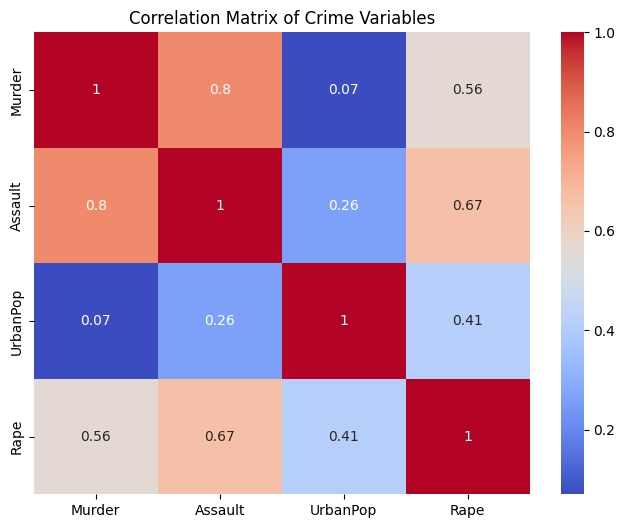

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('State', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Crime Variables")
plt.show()

C:\Users\vedan\AppData\Local\Temp\ipykernel_14500\2355177035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states[col], y=top_states['State'], palette='Reds_r')


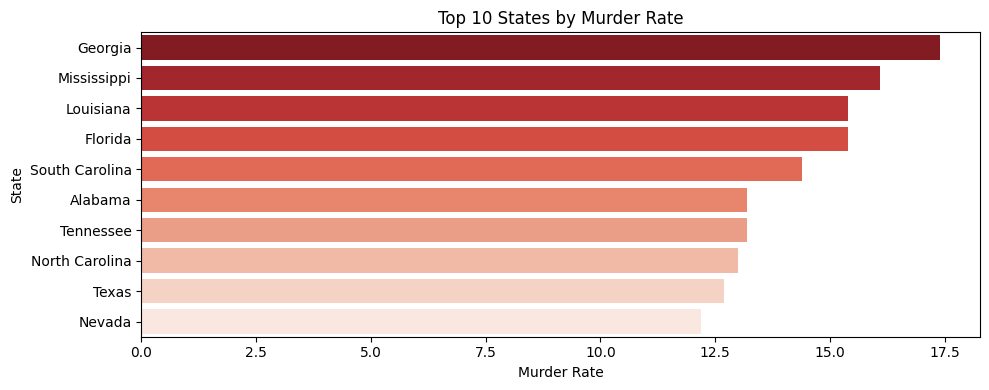

C:\Users\vedan\AppData\Local\Temp\ipykernel_14500\2355177035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states[col], y=top_states['State'], palette='Reds_r')


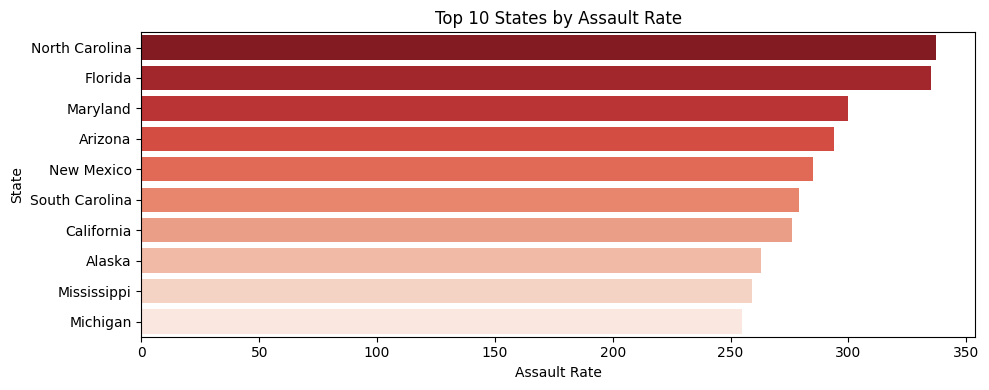

C:\Users\vedan\AppData\Local\Temp\ipykernel_14500\2355177035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states[col], y=top_states['State'], palette='Reds_r')


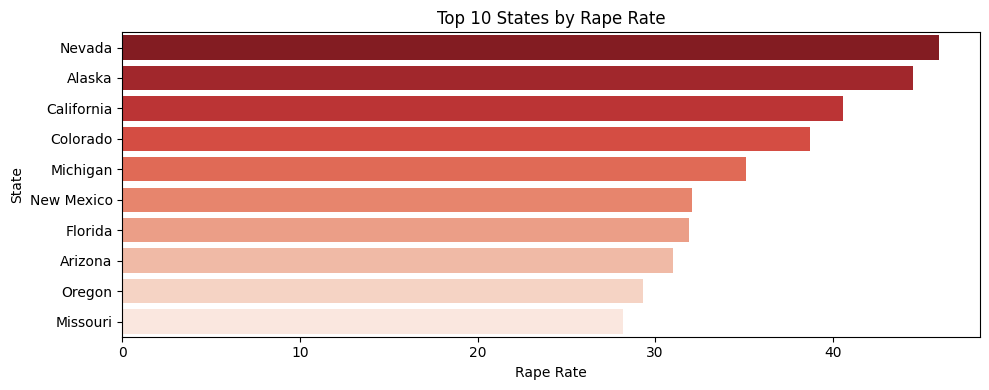

In [5]:
for col in ['Murder', 'Assault', 'Rape']:
    top_states = df.sort_values(by=col, ascending=False).head(10)
    plt.figure(figsize=(10,4))
    sns.barplot(x=top_states[col], y=top_states['State'], palette='Reds_r')
    plt.title(f"Top 10 States by {col} Rate")
    plt.xlabel(f"{col} Rate")
    plt.ylabel("State")
    plt.tight_layout()
    plt.show()


In [6]:
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View how many states per cluster
df['Cluster'].value_counts()


Cluster
3    17
0    13
2    12
1     8
Name: count, dtype: int64

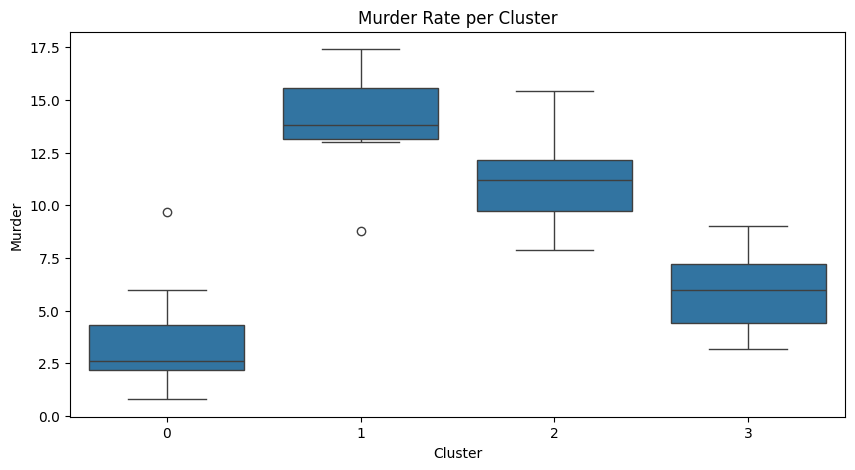

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Cluster', y='Murder')
plt.title("Murder Rate per Cluster")
plt.show()


In [9]:
# Mapping from state name to abbreviation
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add abbreviation column
df['State_Abbrev'] = df['State'].map(state_abbrev)


fig = px.choropleth(
    df,
    locations='State_Abbrev',
    locationmode='USA-states',
    color='Cluster',
    scope='usa',
    color_continuous_scale='Blues',
    title='Crime Clusters by State'
)
fig.show(renderer="browser")


In [10]:
print("📊 Average Crime Stats per Cluster:")
print(df.groupby('Cluster')[['Murder', 'Assault', 'UrbanPop', 'Rape']].mean().round(2))


📊 Average Crime Stats per Cluster:
         Murder  Assault  UrbanPop   Rape
Cluster                                  
0          3.60    78.54     52.08  12.18
1         13.94   243.62     53.75  21.41
2         10.97   264.00     76.50  33.61
3          5.85   141.18     73.65  19.34
